## Task: Predict House Price
given:area, room number and price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
means = data.mean().values
stds = data.std().values
mins = data.min().values
maxs = data.max().values
data_ = data.values
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


 Scaling is for accelerating Gradient Descent. Scale back after Gradient Descent

In [4]:
data = (data - data.mean())/data.std() # Features Scaling by std
#data = (data - data.mean())/(data.max() - data.min())# Features Scaling by range
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [5]:
# set x0 = 1
data.insert(0, 'x0(j)', 1)
data.head()

,x0(j),Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


## Cost Function
![](img/cost.png)

In [6]:
# Cost Function
def computeCost(X, Y, theta):
    inner = np.power((X * theta.T) - Y, 2)
    return np.sum(inner) / (2 * len(X))

## Gradient Descent
![](img/gradient.png)

In [7]:
def gradientDescent(X, Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    numFea = int(theta.shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        errors = X * theta.T - Y
        
        for j in range(numFea):
            XsTimeErrorsSum = np.matmul(X[:,j].transpose(), errors)[0,0] # this is a matrix multiplication
            partialDerivative = XsTimeErrorsSum/len(X)
            temp[0,j] = temp[0,j] - alpha * partialDerivative
    
        theta = temp
        cost[i] = computeCost(X, Y, theta)
    
    return theta, cost

In [8]:
#Create Matrix X, Vector theta and Y
cols = data.shape[1]
X = data.iloc[:, :cols-1]
Y = data.iloc[:, cols-1:]

X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0, 0, 0]))

In [9]:
# perform linear regression on the data set
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, Y, theta, alpha, iters)

# get the cost(error) of the model
computeCost(X, Y, g)

0.13070336960771892

In [10]:
g

matrix([[-1.10963248e-16,  8.78503652e-01, -4.69166570e-02]])

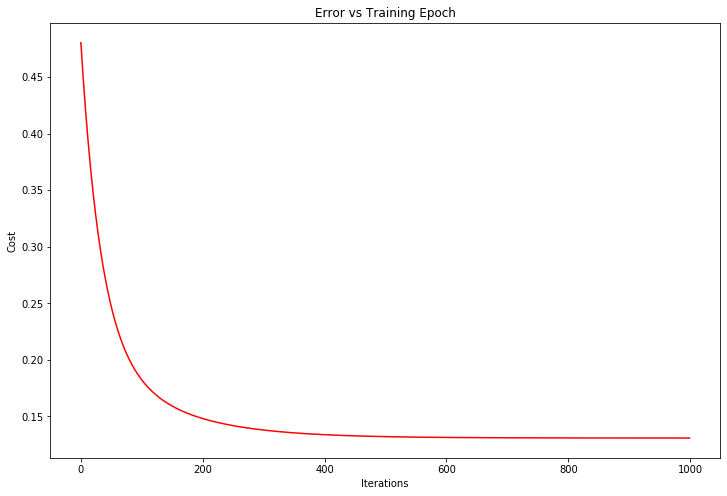

In [11]:
# plot cost fuction vs iterations
plt.figure(figsize=(12, 8))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs Training Epoch')
plt.plot(np.arange(iters), cost, 'r')
plt.show()

## Prediction

In [12]:
def transform(v, std, mean):
    return v * std + mean

def predict(data, means, stds, thetas):
    numFea = len(data)
    data = data - means[:-1]
    p = thetas[0,0]
    
    for i in range(numFea):
        data[i] = data[i]/stds[i] 
        
        p += thetas[0, i+1] * data[i]
    
    p = transform(p, stds[-1], means[-1])
    
    return p

In [13]:
predict([2104,3], means, stds, g)

356006.1649879563

## Plot fitting graph

In [14]:
#......